# NSV Hackfest LSTM Implementation


### Important Notes
- Input data is required as follows:
    - labels in input_label.npy, as prepared in a different notebook
        - dimensions are 370 x 4
        - 370 is the number of behaviors the team extracted from literature and hand labelled
        - 4 is the current number of violence types used as classes
    - data in input_vol.npy, as prepared in another notebook
        - dimensions are 370 x 6 x 300
        - 370 is the number of behaviors the team extracted from literature and hand labelled
        - 6 is the # of words in a behavioral phrase, padded with 0's if less than 6
        - 300 is the depth of the word2vec encoding used
- **YOU DO NOT NEED TO TRAIN A MODEL TO RUN THIS NOTEBOOK**
    - run the imports, set parameters/load data
    - Do not run the build LSTM layers
    - skip to load model - it is highly recommended you load the data you trained it with
    - Continue using the notebook
        

In [1]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence
from sklearn import metrics
from livelossplot import PlotLossesKeras
import random
import numpy as np
import itertools
import matplotlib.pyplot as plt

C:\Users\johnali\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
C:\Users\johnali\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\johnali\AppData\Local\Continuum\miniconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


**SET Parameters and LOAD input data files**

In [2]:
# set parameters and load data
epochs = 100
batch_size = 10
time_steps = 6
features = 300

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'

X = np.load(features_path)
Y = np.load(labels_path)
print(X.shape)
print(Y.shape)

(370, 6, 300)
(370, 4)


### IF YOU ARE CREATING A NEW SHUFFLE OF DATA FOR RETRAINING, CONTINUE HERE
- Otherwise, skip down to LOAD MODEL

In [3]:
# randomly shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)
X = X[s]
Y = Y[s]

In [4]:
# split data into train and test sets
train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

**BUILD LSTM LAYERS:**

In [7]:
# build LSTM layers and train model
model = Sequential()
model.add(LSTM(100, dropout= 0.2, input_shape=(time_steps, features)))
model.add(Activation('relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 160,804
Trainable params: 160,804
Non-trainable params: 0
_________________________________________________________________
None


### ONLY RUN THE MODEL.FIT IF YOU WANT TO TRAIN THE LSTM FROM SCRATCH

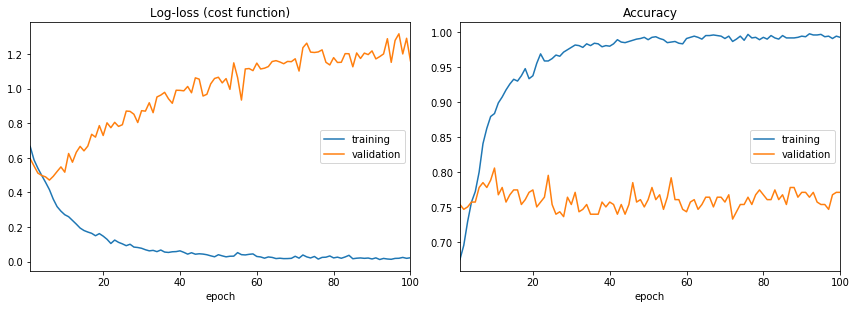

In [8]:
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size, callbacks=[PlotLossesKeras()])

**OPTIONAL SAVE (careful! don't overwrite your previous save)**

In [65]:
# save model
# model.save('model.h5')
# np.save('train_X',train_X)
# np.save('train_y',train_Y)
# np.save('test_X',test_X)
# np.save('test_Y',test_Y)

### LOAD SAVED MODEL HERE

- load model and data, otherwise accuracies are going to be off

In [11]:
# load model & data/shuffle it was generated with:
model = load_model('model.h5')
train_X = np.load('train_X.npy')
train_Y = np.load('train_Y.npy')
test_X = np.load('test_X.npy')
test_Y = np.load('test_Y.npy')

In [12]:
# score model and log accuracy
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.96%


In [12]:
# get predictions
y_pred = model.predict(test_X)
y_pred[:30]

array([[  9.71438348e-01,   2.12540937e-04,   1.37556484e-03,
          3.06578761e-04],
       [  1.24091851e-02,   9.98596847e-01,   3.12259346e-01,
          1.27248772e-04],
       [  6.20450126e-04,   3.22170183e-03,   9.41281021e-01,
          9.98198926e-01],
       [  1.15530530e-03,   2.68097175e-03,   3.09408503e-03,
          9.99265134e-01],
       [  9.97535229e-01,   1.02909142e-02,   9.86129105e-01,
          1.99471833e-04],
       [  6.79294532e-03,   1.97275294e-04,   9.27829096e-05,
          1.11442972e-02],
       [  1.09338039e-03,   5.13771607e-04,   1.68889310e-04,
          2.39704925e-04],
       [  5.30121103e-03,   5.56225896e-05,   1.93081127e-04,
          1.47235848e-03],
       [  9.18874264e-01,   3.89384245e-03,   1.25234819e-03,
          1.05569707e-04],
       [  8.66272487e-03,   2.16032815e-04,   9.31978583e-01,
          3.13994810e-02],
       [  2.71679908e-02,   1.41049488e-04,   9.88988340e-01,
          2.83243810e-03],
       [  2.25122586e

In [15]:
behavior = 'my child struck antoher child'
# clean, lemitize, stem
# score
# similar phrases

In [13]:
# create list of classes for input to confusion matrix
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [14]:
# create y true and y predictions to input into confusion matrix
# values must be strings or ints for scikit-learn's confusion matrix, so we must transform them
yt = []
for label in test_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

NameError: name 'y_pred' is not defined

In [15]:
confusion = metrics.confusion_matrix(yt, yp, labels=classes)
confusion

array([[10,  4,  1,  4,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  1,  0,  2,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,

In [16]:
# plot confusion matrix with ALL class labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[10  4  1  4  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 3  1  1  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  2  1  0  2  0  0  0  0  0  0  1  0  0]
 [ 4  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  2  1  0  0  0  0  1  2  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


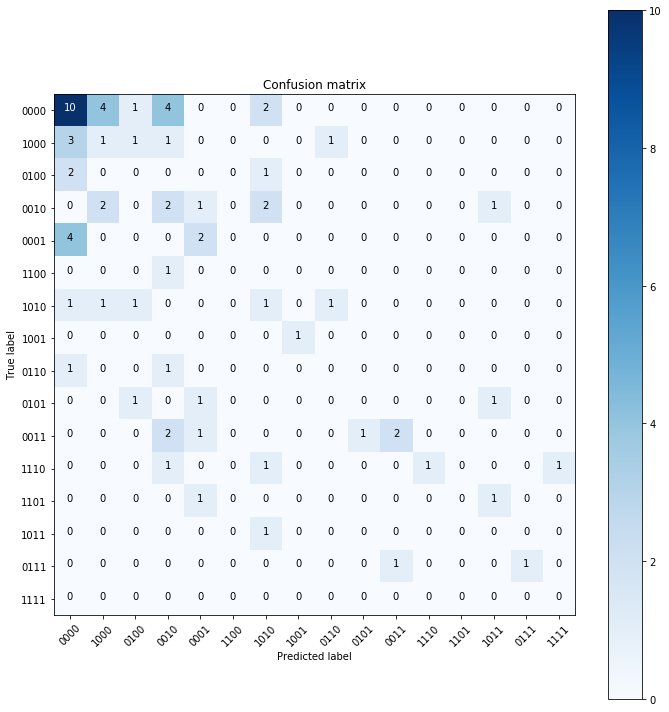

In [17]:
# compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=classes, title='Confusion matrix')

plt.show()

In [9]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [10]:
tsne_plot(model)

AttributeError: 'Sequential' object has no attribute 'wv'